<a href="https://colab.research.google.com/github/joshkearstan/budgetc/blob/main/Kearstan_testtwowork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importation of neccesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Upload file
from google.colab import files
uploaded = files.upload()

#Load the data set
file_name = "/Test2_dataset.xlsx"
df = pd.read_excel(file_name)
df.head()

Saving Test2_dataset.xlsx to Test2_dataset.xlsx


,Catalyst,Ratio of CH4 in Feed,Reaction Temperature,Ni Loading,Reaction Time,Pore Size,Pore Volume,Surface Area,H2-TPR Peak Temperature,Ni Particle Size,Ni Dispersion,Modifier Electronegativity,GHSV,CH4 Conversion,CO2 Conversion,Syngas_Ratio
0,Ni−SiO2‑550,0.15,650,10.0,0.5,4.7,0.58,476.0,640.0,2.9,NaN,1.96,60000,68.5,73.6,0.7
1,Ni−SiO2‑750,0.15,650,10.0,0.5,4.7,0.58,476.0,640.0,4.6,NaN,1.96,60000,66.9,72.4,0.7
2,Ni/Sn0.2−SiO2‑550,0.15,650,10.0,0.5,5.2,0.58,455.0,457.0,2.9,NaN,1.96,60000,18.4,26.1,1.0
3,Ni/Sn0.2−SiO2‑750,0.15,650,10.0,0.5,5.2,0.58,455.0,457.0,4.6,NaN,1.96,60000,14.6,19.9,0.9
4,Ni/Sn0.05−SiO2‑550,0.15,650,10.0,0.5,4.8,0.82,599.0,558.0,3.9,NaN,1.96,60000,61.3,74.0,0.7


First I downloaded the neccesary files and import neccesary libraries to run this code.

In [2]:
# Check for missing data
missing_data = df.isnull().sum()
print(missing_data)

#Display columns with missing data
missing_columns = missing_data[missing_data > 0]
print(missing_columns)

Catalyst                         0
Ratio of CH4 in Feed             0
Reaction Temperature             0
Ni Loading                       0
Reaction Time                    0
Pore Size                        0
Pore Volume                      0
Surface Area                     0
H2-TPR Peak Temperature          0
Ni Particle Size                 0
Ni Dispersion                 1056
Modifier Electronegativity       0
GHSV                             0
CH4 Conversion                  49
CO2 Conversion                  77
Syngas_Ratio                    76
dtype: int64
Ni Dispersion     1056
CH4 Conversion      49
CO2 Conversion      77
Syngas_Ratio        76
dtype: int64


This code block is to sift through the excel spreadsheet to find missing data and identify where it is.  Seems to have a lot of missing data in this set.

In [4]:
# Dropping rows with missing data
df = df.dropna()

#Print the dataset's column
print(df.columns)

df.head()

Index(['Catalyst', 'Ratio of CH4 in Feed', 'Reaction Temperature',
       'Ni Loading', 'Reaction Time', 'Pore Size', 'Pore Volume',
       'Surface Area', 'H2-TPR Peak Temperature', 'Ni Particle Size',
       'Ni Dispersion', 'Modifier Electronegativity', 'GHSV', 'CH4 Conversion',
       'CO2 Conversion', 'Syngas_Ratio'],
      dtype='object')


,Catalyst,Ratio of CH4 in Feed,Reaction Temperature,Ni Loading,Reaction Time,Pore Size,Pore Volume,Surface Area,H2-TPR Peak Temperature,Ni Particle Size,Ni Dispersion,Modifier Electronegativity,GHSV,CH4 Conversion,CO2 Conversion,Syngas_Ratio
17,3%-Ni/(-Al2O3),0.15,800,4.09,120.0,19.7,0.70,129.9,790.0,3.3,15.9,1.12,108000,84.9,89.0,1.0
18,5%-Ni/(-Al2O3),0.15,800,4.68,120.0,20.9,0.69,128.7,786.0,6.3,15.3,1.12,108000,92.0,97.4,1.0
19,10%-Ni/(-Al2O3),0.15,800,3.64,120.0,23.9,0.66,123.3,785.0,9.2,13.2,1.12,108000,92.5,99.0,1.0
20,20%-Ni/(-Al2O3),0.15,800,4.23,120.0,25.4,0.62,93.4,782.0,11.1,9.3,1.12,108000,93.0,99.0,1.0
21,3%-Ni/(-Al2O3),0.15,800,4.09,60.0,19.7,0.70,129.9,790.0,3.3,15.9,1.12,108000,84.2,90.0,1.0


I chose to get rid of any rows with issing data, spit the names for these rows out and then reprint the data without them.

In [5]:
#Check data types to identify numeric columns
df.dtypes

,0
Catalyst,object
Ratio of CH4 in Feed,float64
Reaction Temperature,int64
Ni Loading,float64
Reaction Time,float64
Pore Size,float64
Pore Volume,float64
Surface Area,float64
H2-TPR Peak Temperature,float64
Ni Particle Size,float64


This code specficially shoots out what is a numerical or categorical value needed in the code.  Everything is either an integer or a float so we do not need to replace anything within the dataet


In [6]:
# Display Summaary Statistics
summary_statistics = df.describe()
print(summary_statistics)

       Ratio of CH4 in Feed  Reaction Temperature  Ni Loading  Reaction Time  \
count            594.000000            594.000000  594.000000     594.000000   
mean               0.365529            703.888889    9.543805      18.607290   
std                0.143465             78.283834    5.839814      26.564926   
min                0.100000            450.000000    0.300000       0.200000   
25%                0.250000            650.000000    4.932500       1.000000   
50%                0.400000            700.000000    9.770000       8.000000   
75%                0.500000            750.000000   10.600000      24.000000   
max                0.500000            900.000000   30.800000     200.000000   

        Pore Size  Pore Volume  Surface Area  H2-TPR Peak Temperature  \
count  594.000000   594.000000    594.000000               594.000000   
mean    11.094705     0.431652    196.171128               656.206515   
std      8.772826     0.283013    159.363144               1

This sepcfic task just lists out all possible summary statistic for each column of the data thus far.

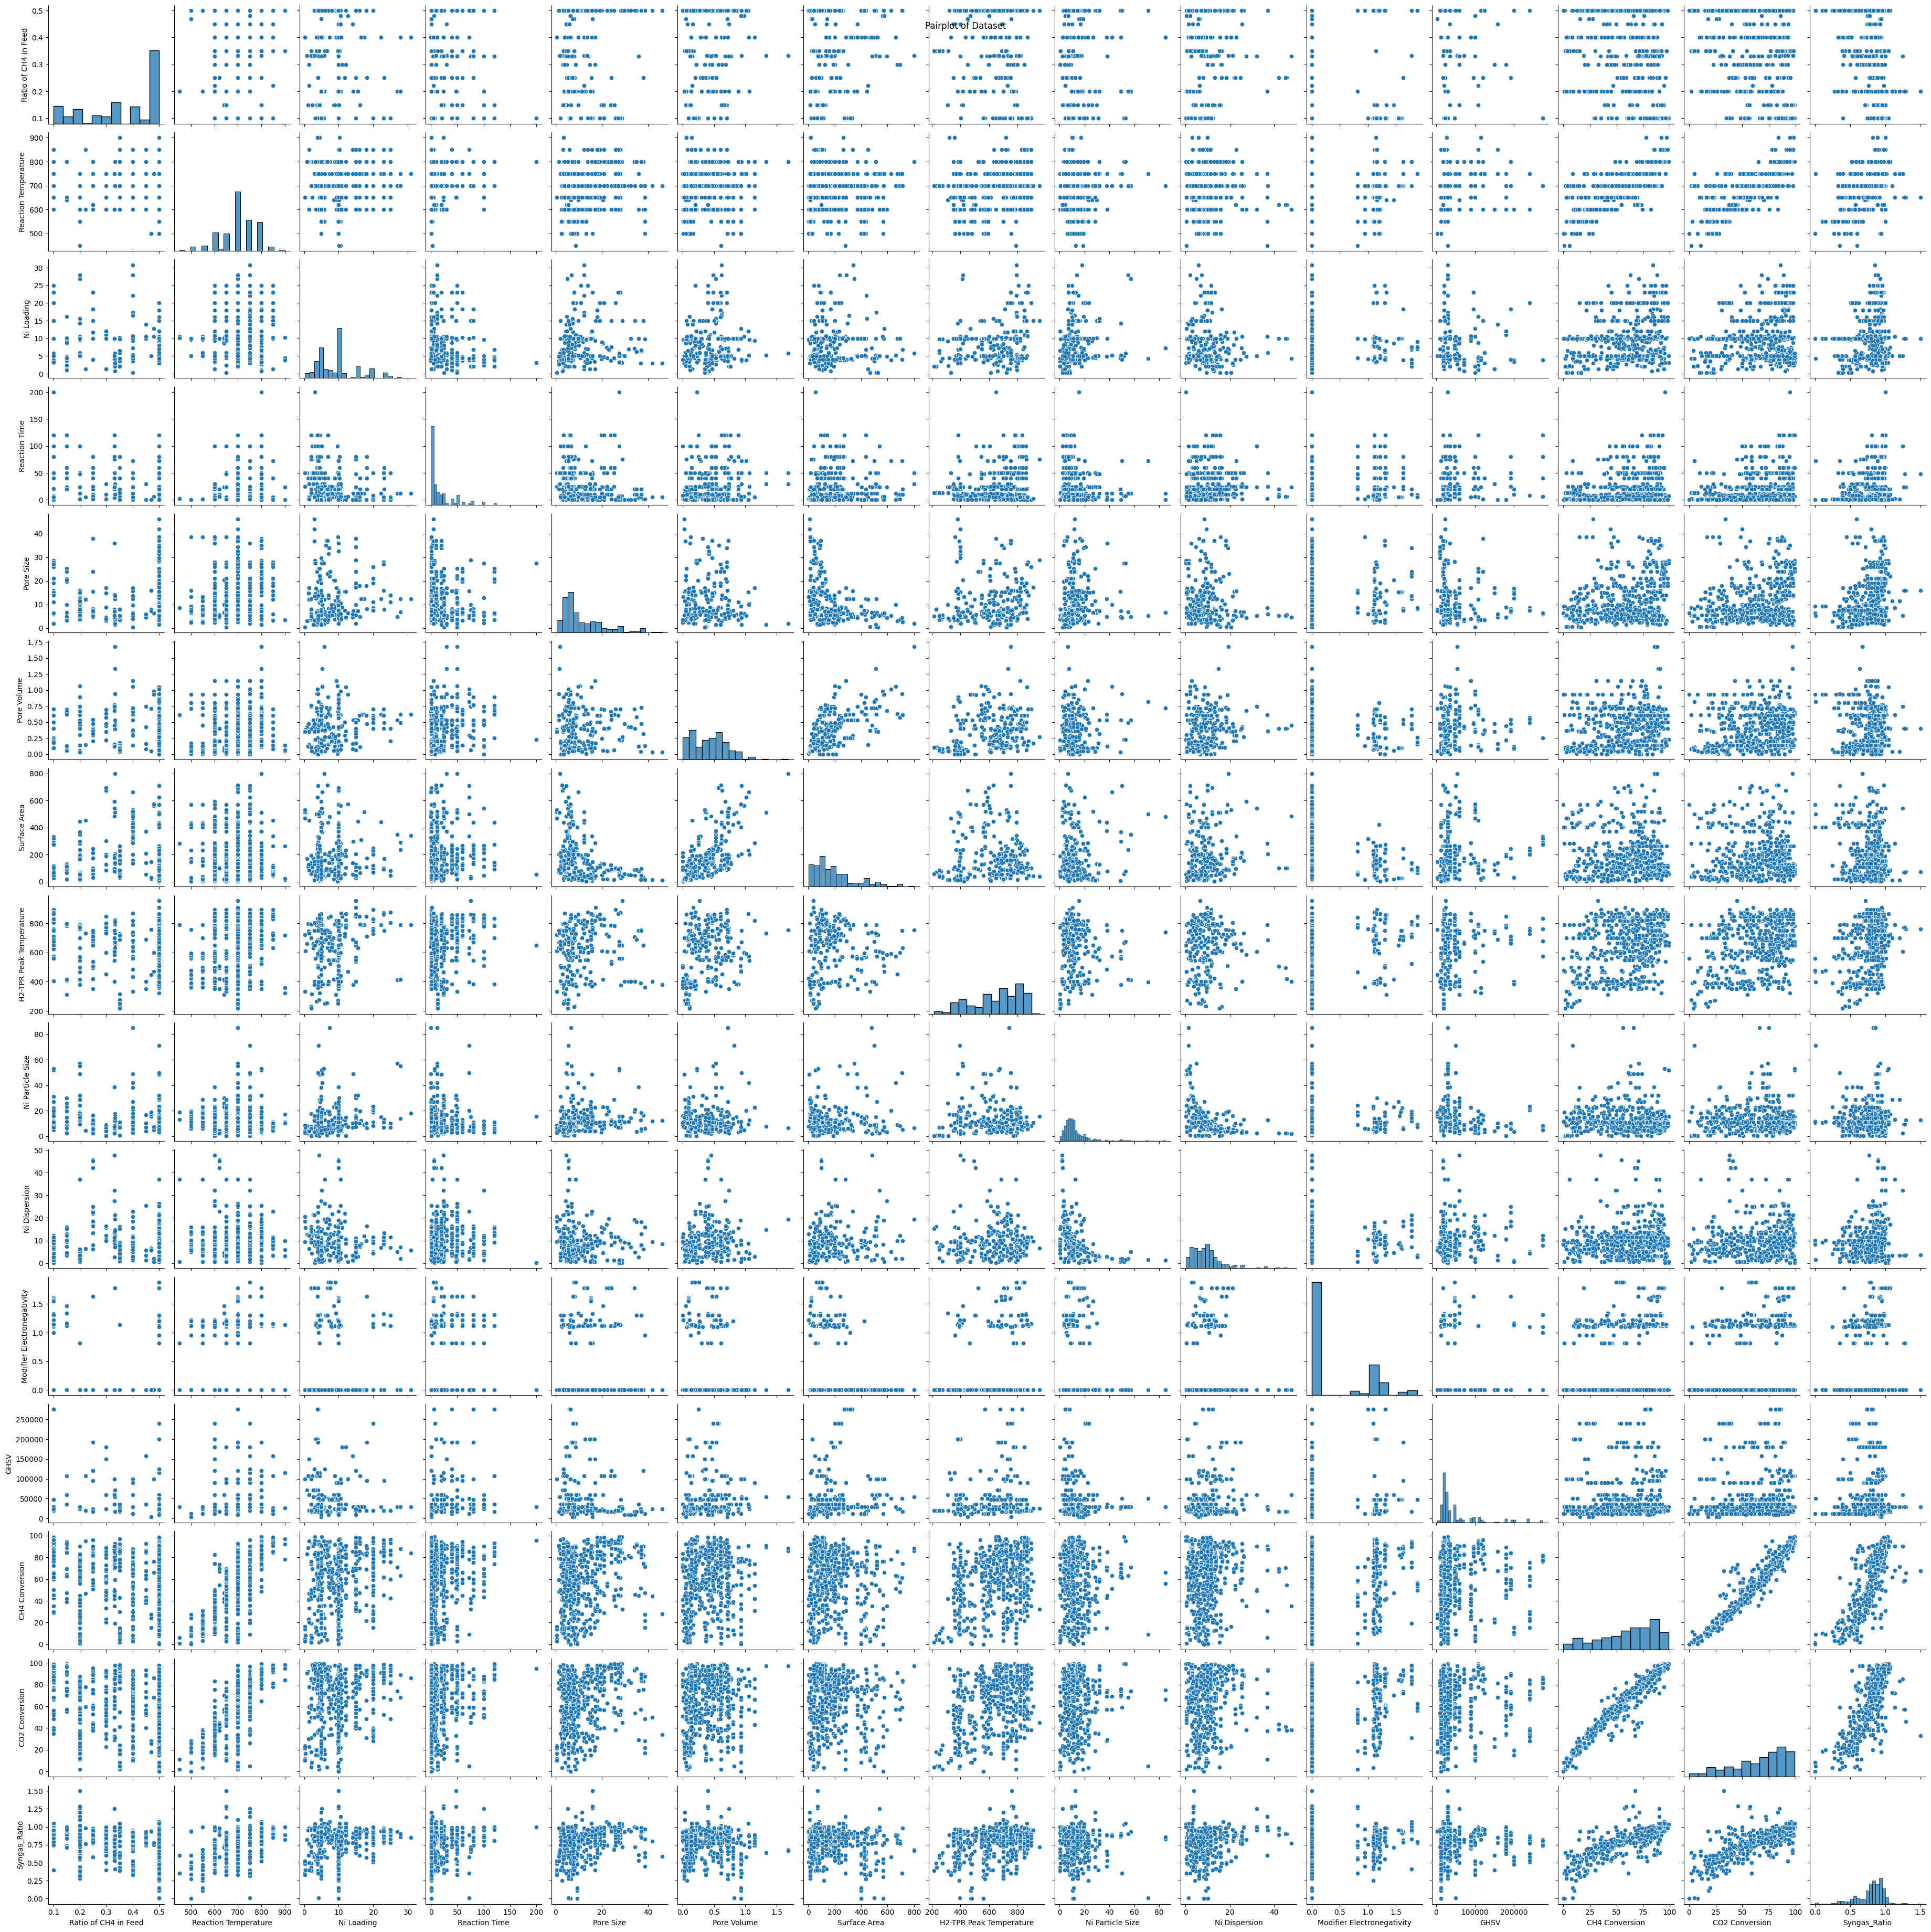

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot a pairplot to visualize relationships between variables
sns.pairplot(df)
plt.suptitle('Pairplot of Dataset')
plt.show()

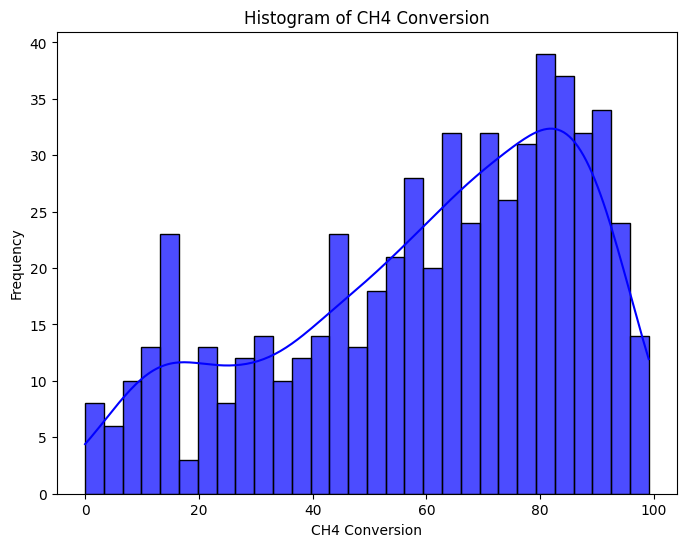

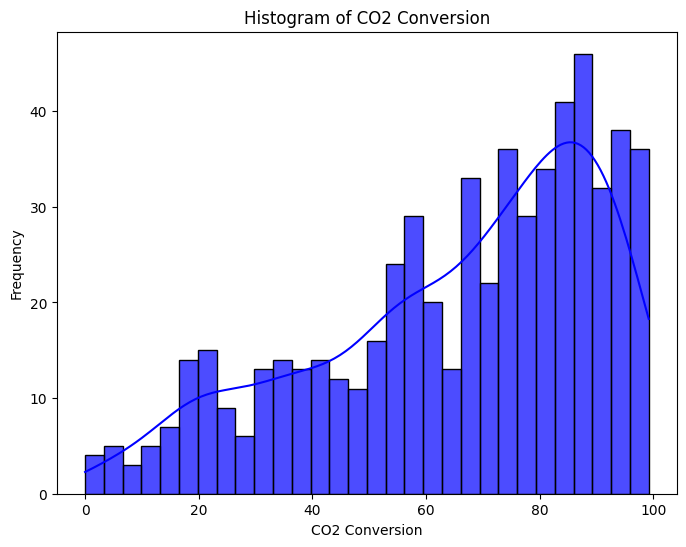

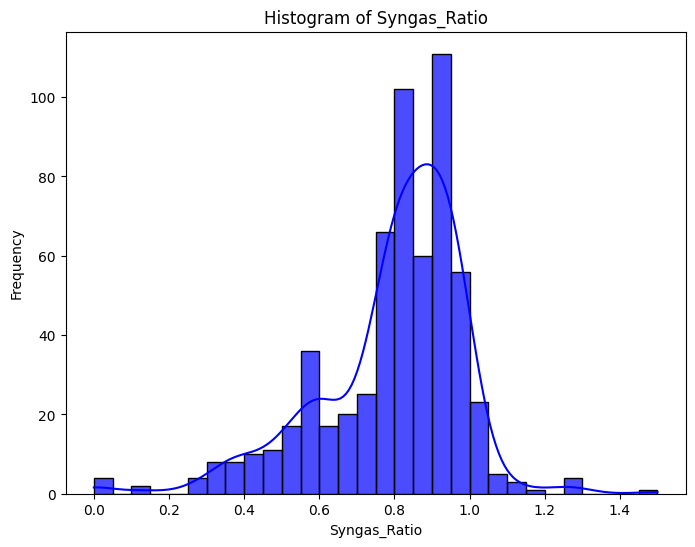

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.histplot(df['CH4 Conversion'], bins=30, alpha=0.7, kde=True, color='blue')
plt.title('Histogram of CH4 Conversion')
plt.xlabel('CH4 Conversion')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8,6))
sns.histplot(df['CO2 Conversion'], bins=30, alpha=0.7, kde=True, color='blue')
plt.title('Histogram of CO2 Conversion')
plt.xlabel('CO2 Conversion')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8,6))
sns.histplot(df['Syngas_Ratio'], bins=30, alpha=0.7, kde=True, color='blue')
plt.title('Histogram of Syngas_Ratio')
plt.xlabel('Syngas_Ratio')
plt.ylabel('Frequency')
plt.show()



Above is the created histograms for the target data in the set.

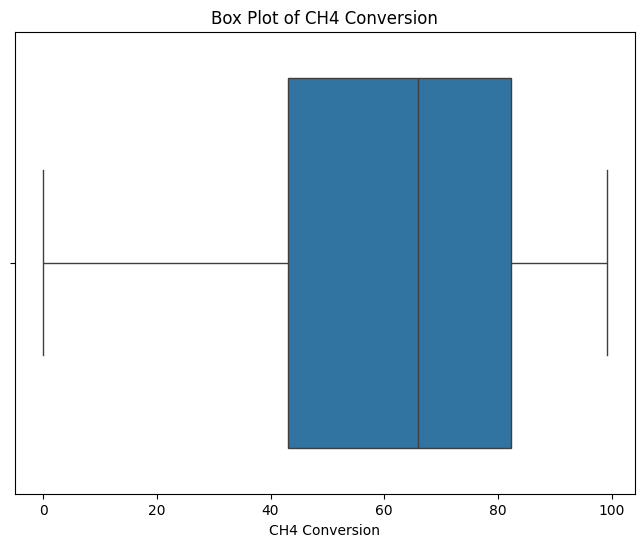

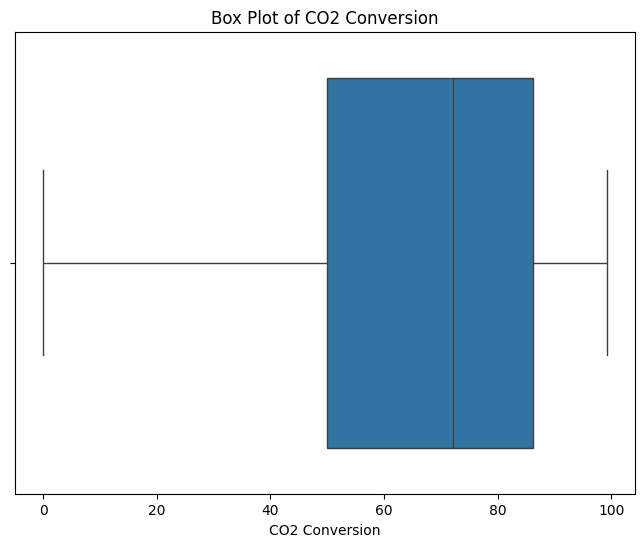

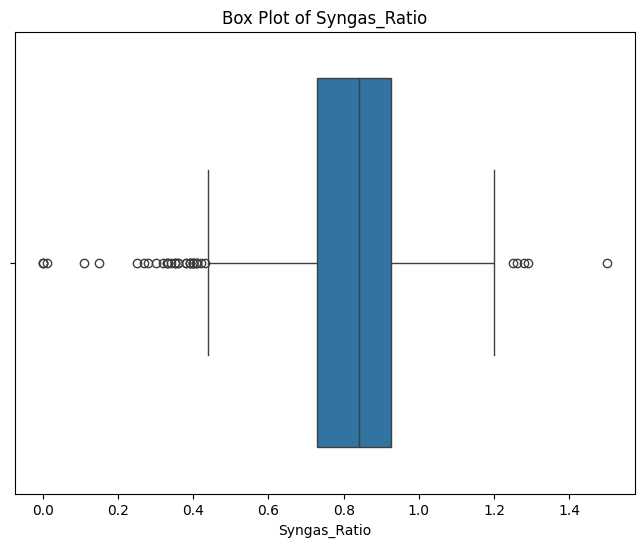

In [10]:
#Plot Box Plot
plt.figure(figsize=(8,6))
sns.boxplot(x=df['CH4 Conversion'])
plt.title('Box Plot of CH4 Conversion')
plt.xlabel('CH4 Conversion')
plt.show()

plt.figure(figsize=(8,6))
sns.boxplot(x=df['CO2 Conversion'])
plt.title('Box Plot of CO2 Conversion')
plt.xlabel('CO2 Conversion')
plt.show()

plt.figure(figsize=(8,6))
sns.boxplot(x=df['Syngas_Ratio'])
plt.title('Box Plot of Syngas_Ratio')
plt.xlabel('Syngas_Ratio')
plt.show()

Above is the box plots for the target data in the dataset.

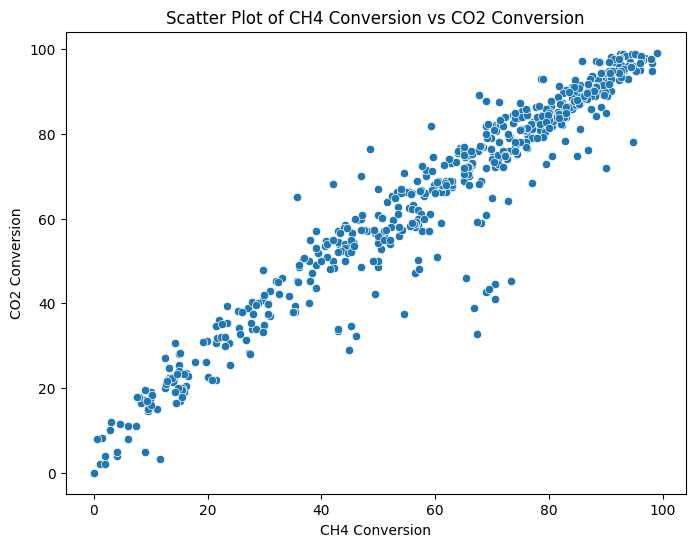

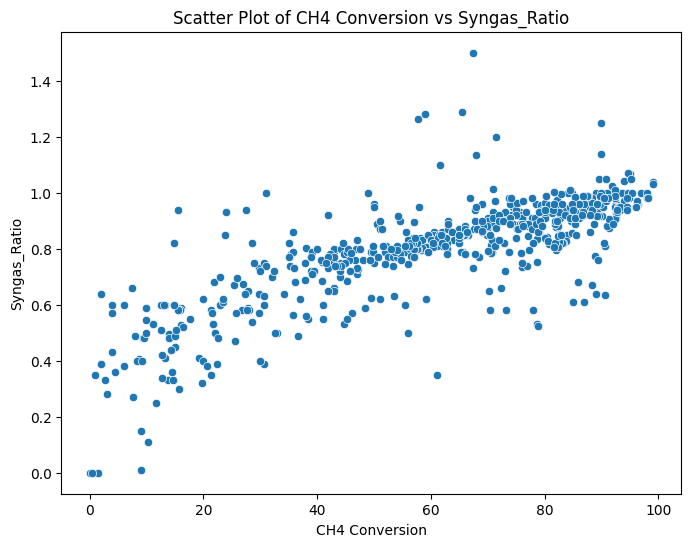

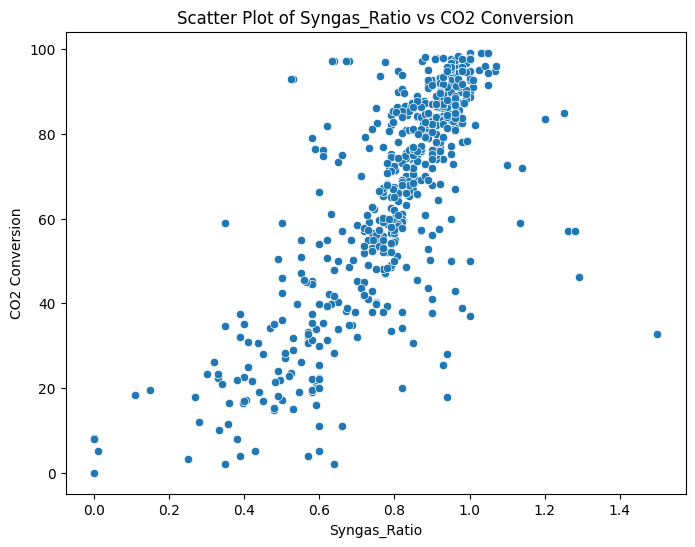

In [20]:
# Plotting a scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['CH4 Conversion'], y=df['CO2 Conversion'])
plt.title('Scatter Plot of CH4 Conversion vs CO2 Conversion')
plt.xlabel('CH4 Conversion')
plt.ylabel('CO2 Conversion')
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(x=df['CH4 Conversion'], y=df['Syngas_Ratio'])
plt.title('Scatter Plot of CH4 Conversion vs Syngas_Ratio')
plt.xlabel('CH4 Conversion')
plt.ylabel('Syngas_Ratio')
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Syngas_Ratio'], y=df['CO2 Conversion'])
plt.title('Scatter Plot of Syngas_Ratio vs CO2 Conversion')
plt.xlabel('Syngas_Ratio')
plt.ylabel('CO2 Conversion')
plt.show()

Above is the scatter plot of each fo the target data columns against one another to show some relationships in the data.

In [15]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Print the categorical columns
print(categorical_columns)

Index(['Catalyst'], dtype='object')


In [16]:
# Apply one-hot encoding to categorical values
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Display the encoded dataset
df_encoded.head()

,Ratio of CH4 in Feed,Reaction Temperature,Ni Loading,Reaction Time,Pore Size,Pore Volume,Surface Area,H2-TPR Peak Temperature,Ni Particle Size,Ni Dispersion,...,Catalyst_Y,Catalyst_Y-Ni/MgAl,Catalyst_Y2O3/10Ni/SBA-15,Catalyst_Y–2%Nd2O3,Catalyst_Y–2.5%Nd2O3,Catalyst_Y–3%Nd2O3,Catalyst_Y–3.5%Nd2O3,Catalyst_Y–4%Nd2O,Catalyst_Y–Ni/SBA-16-MgO,Catalyst_ZrO2/10Ni/SBA-15
17,0.15,800,4.09,120.0,19.7,0.70,129.9,790.0,3.3,15.9,...,False,False,False,False,False,False,False,False,False,False
18,0.15,800,4.68,120.0,20.9,0.69,128.7,786.0,6.3,15.3,...,False,False,False,False,False,False,False,False,False,False
19,0.15,800,3.64,120.0,23.9,0.66,123.3,785.0,9.2,13.2,...,False,False,False,False,False,False,False,False,False,False
20,0.15,800,4.23,120.0,25.4,0.62,93.4,782.0,11.1,9.3,...,False,False,False,False,False,False,False,False,False,False
21,0.15,800,4.09,60.0,19.7,0.70,129.9,790.0,3.3,15.9,...,False,False,False,False,False,False,False,False,False,False


In [17]:
# Assuming df_encoded is your dataset after one-hot encoding
encoded_columns = [col for col in df_encoded.columns if col not in df.columns]

# Display the encoded columns
print(encoded_columns)

['Catalyst_1.0Pt-12Ni', 'Catalyst_10%-Ni/(-Al2O3)', 'Catalyst_10Ni(12T)/MA', 'Catalyst_10Ni(18T)/MA', 'Catalyst_10Ni(20T)/MA', 'Catalyst_10Ni-SBA15', 'Catalyst_10Ni/MA', 'Catalyst_10Ni/MgO', 'Catalyst_10Ni/SBA-15', 'Catalyst_12%Ni/Al2O3', 'Catalyst_12%Ni@Al2O3', 'Catalyst_12Ni', 'Catalyst_12NiAl-S', 'Catalyst_12NiMgAl-S', 'Catalyst_15%Ni/Al2O3 ', 'Catalyst_15%Ni/CeO2-Al2O3 ', 'Catalyst_15N/iMCM-22', 'Catalyst_15Ni/ITQ-2', 'Catalyst_15Ni/MgO', 'Catalyst_1K-Ni /MgAl', 'Catalyst_20%-Ni/(-Al2O3)', 'Catalyst_20Ni/HT', 'Catalyst_20Ni/HT-4La', 'Catalyst_20Ni/HT-8La', 'Catalyst_2Ni-3ln/AL2O3', 'Catalyst_2Ni/Al', 'Catalyst_2Ni/H-Al', 'Catalyst_3%-Ni/(-Al2O3)', 'Catalyst_30Ni/ITQ-2', 'Catalyst_30Ni/MCM-22', 'Catalyst_3K-Ni /MgAl', 'Catalyst_3NZH', 'Catalyst_3NZN', 'Catalyst_3NZO', 'Catalyst_3Ni-2ln/AL2O3', 'Catalyst_3Sm-10Ni-SBA15', 'Catalyst_4Ni-1ln/AL2O3', 'Catalyst_5%-Ni/(-Al2O3)', 'Catalyst_5%Ni/ La2O3- HT', 'Catalyst_5%Ni/ La2O3- KIT-6', 'Catalyst_5%Ni/ La2O3–S', 'Catalyst_5K-Ni /MgAl', 'Ca

In [18]:
# Exclude one-hot encoded columns for the dataset
df_no_encoding = df_encoded.drop(columns=encoded_columns)



All df.encoding cells above this are just preparing the data for heatmap analysis.  Ensuring categorical columns are removed and that the dataset is properly inline.

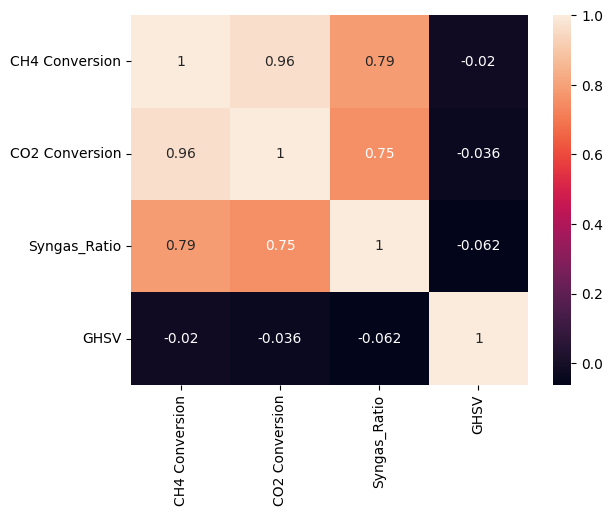

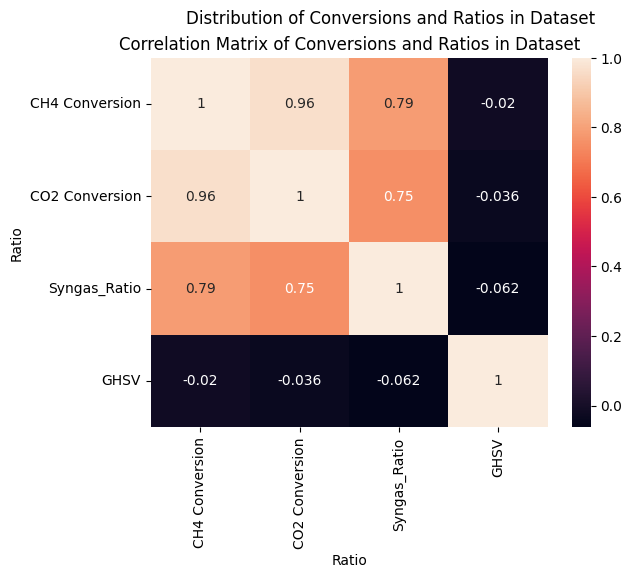

In [21]:
# Correlation analysis (if applicable)
correlation_matrix = df[['CH4 Conversion', 'CO2 Conversion', 'Syngas_Ratio', 'GHSV']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()
# Add title and labels
plt.suptitle('Distribution of Conversions and Ratios in Dataset')  # Set the overall title
plt.xlabel('Value')
plt.ylabel('Frequency')


# Correlation analysis (if applicable)
correlation_matrix = df[['CH4 Conversion', 'CO2 Conversion', 'Syngas_Ratio', 'GHSV']].corr()
sns.heatmap(correlation_matrix, annot=True)

# Add title and labels for the heatmap
plt.title('Correlation Matrix of Conversions and Ratios in Dataset')
plt.xlabel('Ratio')
plt.ylabel('Ratio')
plt.show()

Above are the correlation maps of every target column against eachother with the added GHSV to further give insight on how the data stacks against eachother.